In [93]:
import pandas as pd
import numpy as np
from pydantic import BaseModel
from typing import List, Optional
import matplotlib.pyplot as plt
import ast
import seaborn as sns


In [8]:
fe=pd.read_csv('trades_data.csv')


In [10]:
fe.head()

,Port_ID,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,2024-06-20 16:07:36,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,2024-06-20 16:06:58,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,2024-06-20 16:06:56,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True


In [11]:
fe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Port_ID              211277 non-null  int64  
 1   time                 211277 non-null  object 
 2   symbol               211277 non-null  object 
 3   side                 211277 non-null  object 
 4   price                211277 non-null  float64
 5   fee                  211277 non-null  float64
 6   feeAsset             211277 non-null  object 
 7   quantity             211277 non-null  float64
 8   quantityAsset        211277 non-null  object 
 9   realizedProfit       211277 non-null  float64
 10  realizedProfitAsset  211277 non-null  object 
 11  baseAsset            211277 non-null  object 
 12  qty                  211277 non-null  float64
 13  positionSide         211277 non-null  object 
 14  activeBuy            211277 non-null  bool   
dtypes: bool(1), float

# Portfolio Performance Metrics

We will calculate the following key performance metrics for each portfolio:

1. **ROI (Return on Investment)**
   - Measures the percentage return relative to the initial investment
   - ROI = (Final Value - Initial Value) / Initial Value * 100%

2. **PnL (Profit and Loss)**
   - The absolute dollar value of profits or losses
   - PnL = Final Value - Initial Value

3. **Sharpe Ratio** 
   - Risk-adjusted return metric
   - Measures excess returns per unit of risk
   - Higher ratio indicates better risk-adjusted performance

4. **MDD (Maximum Drawdown)**
   - Largest peak-to-trough decline
   - Measures downside risk and worst-case scenario
   - Lower MDD indicates better downside protection

5. **Win Rate**
   - Percentage of profitable trades
   - Win Rate = (Winning Trades / Total Trades) * 100%

6. **Win Positions**
   - Total number of profitable trades

7. **Total Positions** 
   - Total number of trades executed


# 1.ROI

In [12]:
# Group by Port_ID and calculate ROI for each portfolio
portfolio_roi = fe.groupby('Port_ID').agg({
    'realizedProfit': 'sum',  # Sum up all realized profits
    'quantity': 'sum'         # Sum up total quantity traded (investment)
}).reset_index()

# Calculate ROI percentage
portfolio_roi['ROI_%'] = (portfolio_roi['realizedProfit'] / portfolio_roi['quantity']) * 100

# Display first few rows
portfolio_roi[['Port_ID', 'ROI_%']].head()


,Port_ID,ROI_%
0,3672754654734989568,0.476385
1,3733192481840423936,0.251099
2,3768170840939476993,8.779089
3,3784403294629753856,0.339819
4,3786761687746711808,0.332072


In [13]:
portfolio_roi.describe()


,Port_ID,realizedProfit,quantity,ROI_%
count,1.490000e+02,149.000000,1.490000e+02,149.000000
mean,3.976029e+18,4637.910441,1.383240e+06,1.029542
std,6.895419e+16,7764.101217,2.547454e+06,1.472565
min,3.672755e+18,-12346.682219,2.775560e+03,-0.186837
25%,3.944089e+18,1787.987716,1.621407e+05,0.263952
50%,3.998659e+18,2726.795618,5.963815e+05,0.571080
75%,4.029508e+18,4760.365620,1.626577e+06,1.069325
max,4.041860e+18,71998.855953,2.310909e+07,12.178517


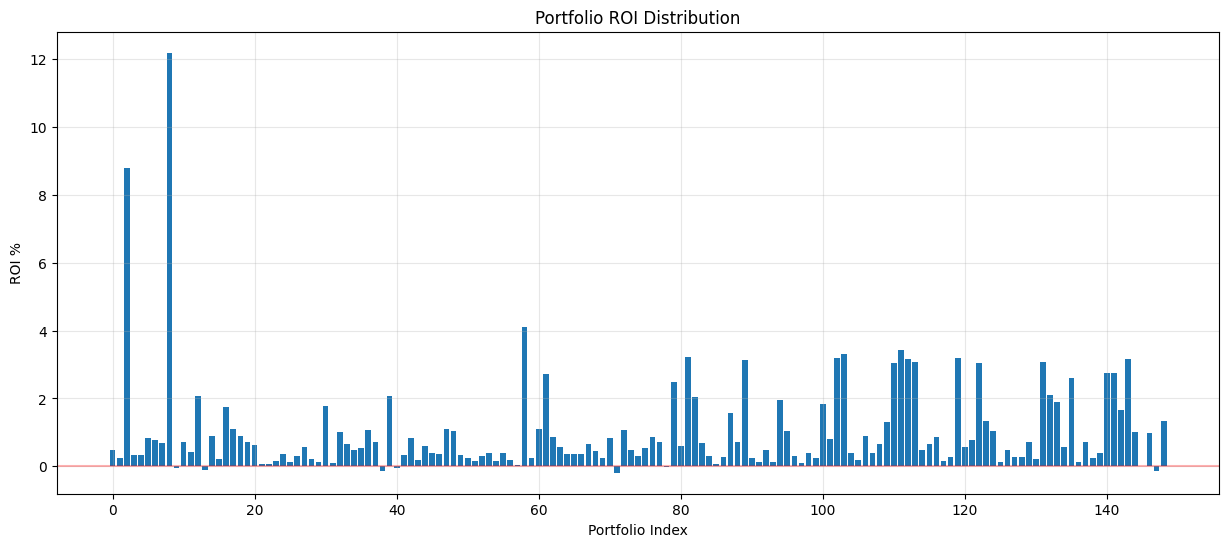

In [38]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# 1. Bar plot 
ax1.bar(range(len(portfolio_roi)), portfolio_roi['ROI_%'])
ax1.set_title('Portfolio ROI Distribution')
ax1.set_xlabel('Portfolio Index')
ax1.set_ylabel('ROI %')
ax1.axhline(y=0, color='r', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)
plt.show()






In [39]:
portfolio_roi.head()



,Port_ID,realizedProfit,quantity,ROI_%
0,3672754654734989568,566.597660,1.189369e+05,0.476385
1,3733192481840423936,2923.977200,1.164472e+06,0.251099
2,3768170840939476993,243.668899,2.775560e+03,8.779089
3,3784403294629753856,2521.814305,7.421060e+05,0.339819
4,3786761687746711808,205.021400,6.174001e+04,0.332072


# 2. Pnl
- Since we have assumed the 'realized_profit' as Net Profit/Loss, so we have this index


In [43]:
fe.realizedProfit.describe()


count    211277.000000
mean          3.270818
std          57.895095
min       -3269.194444
25%           0.000000
50%           0.000000
75%           0.577590
max        8186.254058
Name: realizedProfit, dtype: float64

# 3. SHARPE RATIO
 
|                            Formula
 $$ \text{Sharpe Ratio} = \frac{R_x - R_f}{\sigma_{R_x}} $$
 
 ### Components
 - **$R_x$**: Expected portfolio return
 - **$R_f$**: Risk-free rate of return
 - **$\sigma_{R_x}$**: Standard deviation of portfolio return (volatility)
 - Considering Bitcoin had a Sharpe ratio of 4.35 (OCT 2024), we will use this as our risk-free rate    



In [69]:

portfolio_returns = fe.groupby('Port_ID')['realizedProfit'].agg(['mean', 'std']).reset_index()


risk_free_rate = 0.0435
# risk_free_rate= 0.05


portfolio_returns['sharpe_ratio'] = (portfolio_returns['mean'] - risk_free_rate) / portfolio_returns['std']

portfolio_sharpe = portfolio_returns.sort_values('sharpe_ratio')




In [70]:

print("Portfolio Sharpe Ratios:")
print(portfolio_sharpe[['Port_ID', 'sharpe_ratio']].head())

Portfolio Sharpe Ratios:
                 Port_ID  sharpe_ratio
145  4040382575336130560          -inf
147  4041804592937345281     -0.079536
71   3995532094997544704     -0.065617
40   3946087913459823360     -0.042864
13   3880920727367689984     -0.040006


In [68]:
portfolio_sharpe.head(10)

,Port_ID,mean,std,sharpe_ratio
145,4040382575336130560,0.000000,0.000000,-inf
147,4041804592937345281,-2.109628,27.071103,-0.079776
71,3995532094997544704,-2.040437,31.758990,-0.065822
40,3946087913459823360,-0.006683,1.170746,-0.048416
13,3880920727367689984,-1.219497,31.570473,-0.040212
38,3944239644144231424,-1.384488,58.340145,-0.024588
9,3858510226868015873,-0.282101,20.806616,-0.015961
78,4000877324693233921,-0.138198,59.382871,-0.003169
21,3914654298562589441,0.711119,64.783597,0.010205
22,3919174299855478272,1.149465,100.026440,0.010992


In [71]:
portfolio_sharpe.describe()


c:\D\Project\Primetrade.ai\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Port_ID,mean,std,sharpe_ratio
count,1.490000e+02,149.000000,149.000000,149.000000
mean,3.976029e+18,14.396975,71.790806,-inf
std,6.895419e+16,44.857222,154.011613,NaN
min,3.672755e+18,-2.109628,0.000000,-inf
25%,3.944089e+18,1.714870,18.547799,0.085491
50%,3.998659e+18,5.731290,41.383493,0.162346
75%,4.029508e+18,15.711850,83.651814,0.251585
max,4.041860e+18,534.075700,1786.303732,0.669147


#### We have found Portfolio with infinite Sharpe ratio


In [85]:
inf_count = portfolio_sharpe['sharpe_ratio'].isnull().sum()
print(f"\nNumber of portfolios with infinite Sharpe ratios: {inf_count}")




Number of portfolios with infinite Sharpe ratios: 1


We have one portfolio with infinite Sharpe ratio

In [92]:
# Replace infinite values with NaN

portfolio_sharpe['sharpe_ratio'] = portfolio_sharpe['sharpe_ratio'].replace([np.inf, -np.inf], np.nan)


# Find portfolio with NaN Sharpe ratio
print("\nPortfolio with NaN Sharpe ratio:")
print(portfolio_sharpe[portfolio_sharpe['sharpe_ratio'].isna()][['Port_ID', 'mean', 'std', 'sharpe_ratio']])

# We can see this portfolio has 0 standard deviation, meaning no variation in returns
# This explains the infinite Sharpe ratio when dividing by std=0

# Drop the row with NaN Sharpe ratio for visualization purposes
portfolio_sharpe = portfolio_sharpe.dropna(subset=['sharpe_ratio'])

print("\nDescriptive statistics after handling infinite values:")
print(portfolio_sharpe['sharpe_ratio'].describe())




Portfolio with NaN Sharpe ratio:
                 Port_ID  mean  std  sharpe_ratio
145  4040382575336130560   0.0  0.0           NaN

Descriptive statistics after handling infinite values:
count    148.000000
mean       0.184148
std        0.132871
min       -0.079536
25%        0.086694
50%        0.164336
75%        0.254183
max        0.669147
Name: sharpe_ratio, dtype: float64


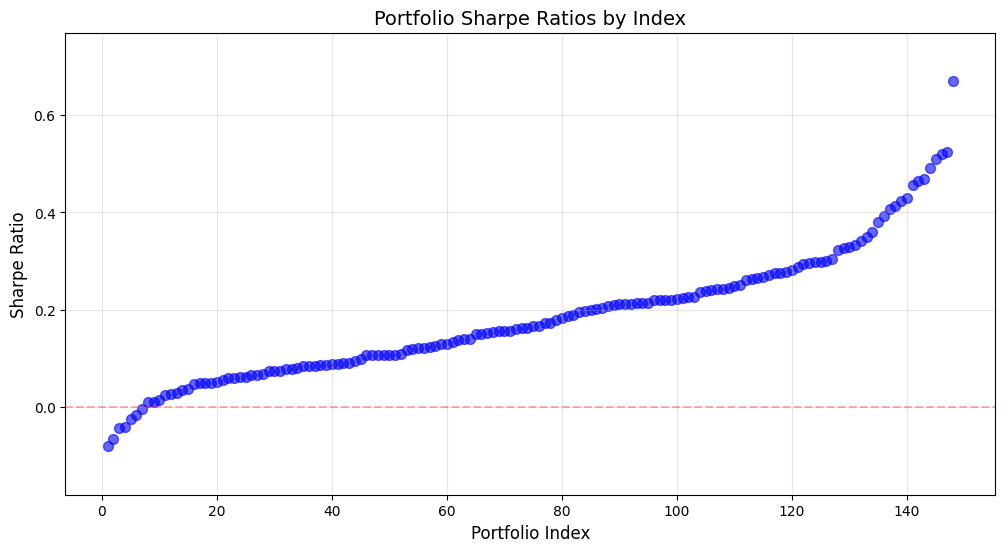

In [89]:
plt.figure(figsize=(12, 6))

plt.scatter(range(len(portfolio_sharpe)), portfolio_sharpe['sharpe_ratio'], 
           alpha=0.6, c='blue', s=50)

plt.title('Portfolio Sharpe Ratios by Index', fontsize=14)
plt.xlabel('Portfolio Index', fontsize=12)
plt.ylabel('Sharpe Ratio', fontsize=12)
plt.grid(True, alpha=0.3)

plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.ylim(portfolio_sharpe['sharpe_ratio'].dropna().min() - 0.1, 
         portfolio_sharpe['sharpe_ratio'].dropna().max() + 0.1)

plt.show()

# 4. MDD



In [121]:
# Ensure sorting
portfolio_returns = portfolio_returns.sort_values(['Port_ID', 'time'])


In [122]:
def calculate_mdd(returns):
    if len(returns) < 2:
        return 0.0
    wealth_index = 1 + returns.cumsum()
    
   
    running_max = wealth_index.expanding().max()
 
    drawdown = (wealth_index - running_max) / running_max
    
    mdd = drawdown.min()
    
    return mdd if not np.isnan(mdd) else 0.0



In [123]:

mdd_by_portfolio = fe.groupby('Port_ID').agg({
    'realizedProfit': lambda x: calculate_mdd(x)
}).reset_index()

# Rename columns for clarity
mdd_by_portfolio.columns = ['Port_ID', 'MDD']

# Remove any remaining infinities
mdd_by_portfolio['MDD'] = mdd_by_portfolio['MDD'].replace([np.inf, -np.inf], np.nan)

In [124]:
mdd_by_portfolio.head()

,Port_ID,MDD
0,3672754654734989568,-0.457804
1,3733192481840423936,-0.760144
2,3768170840939476993,0.000000
3,3784403294629753856,-0.177145
4,3786761687746711808,-2.275486


In [125]:
mdd_by_portfolio.describe(include='all')


,Port_ID,MDD
count,1.490000e+02,149.000000
mean,3.976029e+18,-52.886341
std,6.895419e+16,457.920564
min,3.672755e+18,-5542.044982
25%,3.944089e+18,-1.059629
50%,3.998659e+18,-0.270236
75%,4.029508e+18,0.000000
max,4.041860e+18,0.000000


In [126]:
# mdd_by_portfolio.sort_values('MDD', ascending=False).head(20)
mdd_by_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Port_ID  149 non-null    int64  
 1   MDD      149 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [127]:
mdd_by_portfolio.describe(include='all')



,Port_ID,MDD
count,1.490000e+02,149.000000
mean,3.976029e+18,-52.886341
std,6.895419e+16,457.920564
min,3.672755e+18,-5542.044982
25%,3.944089e+18,-1.059629
50%,3.998659e+18,-0.270236
75%,4.029508e+18,0.000000
max,4.041860e+18,0.000000


In [129]:
mdd_by_portfolio.sort_values('MDD').head(20)


,Port_ID,MDD
78,4000877324693233921,-5542.044982
83,4008537296438699777,-543.756316
128,4033614723417828608,-460.619280
67,3991414786174551297,-299.642095
31,3937714876784951296,-282.166500
52,3966142151544441601,-163.528999
51,3962024093501274881,-127.623000
38,3944239644144231424,-69.399200
54,3975392755164484097,-61.935001
147,4041804592937345281,-44.088986
